In [21]:
## Importing Libraries
import pandas as pd
from mlxtend.frequent_patterns import association_rules, apriori
from mlxtend.preprocessing import TransactionEncoder
import matplotlib.pyplot as plt

### Reading the Dataset - Type 1

In [36]:
groceries = []
with open('groceries.csv') as f:
    groceries = f.read()
groceries = groceries.split('\n')
groceries
groceries_list = []
for i in groceries:
    groceries_list.append(i.split(','))
    groceries_list
    all_groceries_list = [i for item in groceries_list for i in item]
all_groceries_list

['citrus fruit',
 'semi-finished bread',
 'margarine',
 'ready soups',
 'tropical fruit',
 'yogurt',
 'coffee',
 'whole milk',
 'pip fruit',
 'yogurt',
 'cream cheese ',
 'meat spreads',
 'other vegetables',
 'whole milk',
 'condensed milk',
 'long life bakery product',
 'whole milk',
 'butter',
 'yogurt',
 'rice',
 'abrasive cleaner',
 'rolls/buns',
 'other vegetables',
 'UHT-milk',
 'rolls/buns',
 'bottled beer',
 'liquor (appetizer)',
 'pot plants',
 'whole milk',
 'cereals',
 'tropical fruit',
 'other vegetables',
 'white bread',
 'bottled water',
 'chocolate',
 'citrus fruit',
 'tropical fruit',
 'whole milk',
 'butter',
 'curd',
 'yogurt',
 'flour',
 'bottled water',
 'dishes',
 'beef',
 'frankfurter',
 'rolls/buns',
 'soda',
 'chicken',
 'tropical fruit',
 'butter',
 'sugar',
 'fruit/vegetable juice',
 'newspapers',
 'fruit/vegetable juice',
 'packaged fruit/vegetables',
 'chocolate',
 'specialty bar',
 'other vegetables',
 'butter milk',
 'pastry',
 'whole milk',
 'tropical fru

In [37]:
from collections import Counter, OrderedDict

In [38]:
items_frequency = Counter(all_groceries_list)
items_frequency

Counter({'citrus fruit': 814,
         'semi-finished bread': 174,
         'margarine': 576,
         'ready soups': 18,
         'tropical fruit': 1032,
         'yogurt': 1372,
         'coffee': 571,
         'whole milk': 2513,
         'pip fruit': 744,
         'cream cheese ': 390,
         'meat spreads': 42,
         'other vegetables': 1903,
         'condensed milk': 101,
         'long life bakery product': 368,
         'butter': 545,
         'rice': 75,
         'abrasive cleaner': 35,
         'rolls/buns': 1809,
         'UHT-milk': 329,
         'bottled beer': 792,
         'liquor (appetizer)': 78,
         'pot plants': 170,
         'cereals': 56,
         'white bread': 414,
         'bottled water': 1087,
         'chocolate': 488,
         'curd': 524,
         'flour': 171,
         'dishes': 173,
         'beef': 516,
         'frankfurter': 580,
         'soda': 1715,
         'chicken': 422,
         'sugar': 333,
         'fruit/vegetable juice': 711,
   

In [39]:
items_frequency = sorted(items_frequency.items(), key= lambda x:x[1])
items_frequency

[('baby food', 1),
 ('sound storage medium', 1),
 ('', 1),
 ('preservation products', 2),
 ('bags', 4),
 ('kitchen utensil', 4),
 ('baby cosmetics', 6),
 ('frozen chicken', 6),
 ('toilet cleaner', 7),
 ('make up remover', 8),
 ('salad dressing', 8),
 ('whisky', 8),
 ('liqueur', 9),
 ('rubbing alcohol', 10),
 ('hair spray', 11),
 ('frozen fruits', 12),
 ('cream', 13),
 ('honey', 15),
 ('decalcifier', 15),
 ('organic products', 16),
 ('specialty vegetables', 17),
 ('ready soups', 18),
 ('flower soil/fertilizer', 19),
 ('prosecco', 20),
 ('cocoa drinks', 22),
 ('organic sausage', 22),
 ('pudding powder', 23),
 ('tidbits', 23),
 ('cooking chocolate', 25),
 ('soap', 26),
 ('bathroom cleaner', 27),
 ('cookware', 27),
 ('potato products', 28),
 ('fish', 29),
 ('snack products', 30),
 ('nut snack', 31),
 ('artif. sweetener', 32),
 ('canned fruit', 32),
 ('syrup', 32),
 ('nuts/prunes', 33),
 ('abrasive cleaner', 35),
 ('skin care', 35),
 ('specialty fat', 36),
 ('tea', 38),
 ('brandy', 41),
 ('

In [42]:
frequent = list(reversed([i[1] for i in items_frequency]))
frequent

[2513,
 1903,
 1809,
 1715,
 1372,
 1087,
 1072,
 1032,
 969,
 924,
 875,
 814,
 792,
 785,
 764,
 744,
 711,
 705,
 638,
 624,
 580,
 576,
 571,
 567,
 545,
 524,
 516,
 515,
 488,
 473,
 422,
 414,
 390,
 378,
 372,
 368,
 365,
 333,
 329,
 327,
 327,
 324,
 305,
 299,
 294,
 279,
 279,
 276,
 275,
 269,
 256,
 256,
 254,
 246,
 241,
 241,
 229,
 220,
 207,
 189,
 189,
 187,
 176,
 174,
 174,
 173,
 171,
 170,
 168,
 163,
 160,
 148,
 148,
 140,
 130,
 128,
 118,
 115,
 112,
 110,
 109,
 106,
 106,
 106,
 103,
 102,
 101,
 101,
 93,
 91,
 90,
 89,
 89,
 88,
 84,
 84,
 83,
 82,
 80,
 79,
 78,
 75,
 73,
 71,
 68,
 67,
 64,
 64,
 60,
 59,
 57,
 56,
 55,
 54,
 54,
 53,
 51,
 50,
 50,
 50,
 45,
 44,
 42,
 42,
 41,
 41,
 38,
 36,
 35,
 35,
 33,
 32,
 32,
 32,
 31,
 30,
 29,
 28,
 27,
 27,
 26,
 25,
 23,
 23,
 22,
 22,
 20,
 19,
 18,
 17,
 16,
 15,
 15,
 13,
 12,
 11,
 10,
 9,
 8,
 8,
 8,
 7,
 6,
 6,
 4,
 4,
 2,
 1,
 1,
 1]

In [45]:
items = list(reversed([i[0] for i in items_frequency]))
items

['whole milk',
 'other vegetables',
 'rolls/buns',
 'soda',
 'yogurt',
 'bottled water',
 'root vegetables',
 'tropical fruit',
 'shopping bags',
 'sausage',
 'pastry',
 'citrus fruit',
 'bottled beer',
 'newspapers',
 'canned beer',
 'pip fruit',
 'fruit/vegetable juice',
 'whipped/sour cream',
 'brown bread',
 'domestic eggs',
 'frankfurter',
 'margarine',
 'coffee',
 'pork',
 'butter',
 'curd',
 'beef',
 'napkins',
 'chocolate',
 'frozen vegetables',
 'chicken',
 'white bread',
 'cream cheese ',
 'waffles',
 'salty snack',
 'long life bakery product',
 'dessert',
 'sugar',
 'UHT-milk',
 'berries',
 'hamburger meat',
 'hygiene articles',
 'onions',
 'specialty chocolate',
 'candy',
 'frozen meals',
 'misc. beverages',
 'oil',
 'butter milk',
 'specialty bar',
 'ham',
 'beverages',
 'meat',
 'ice cream',
 'sliced cheese',
 'hard cheese',
 'cat food',
 'grapes',
 'chewing gum',
 'red/blush wine',
 'detergent',
 'white wine',
 'pickled vegetables',
 'baking powder',
 'semi-finished brea

### Readiing the Dataset - Type 2

In [ ]:
groc = pd.read_csv('groceries.csv', header=None, names=range(32))
groc

In [ ]:
groc.fillna(0, inplace= True)
groc

In [ ]:
transaction = []
for i in range(0,len(groc)):
    transaction.append([str(groc.values[i, j]) for j in range (0,32) if str(groc.values[i,j])!='0'])

In [ ]:
transaction

In [ ]:
all_items = [i for item in transaction for i in item]
all_items

<ipython-input-51-83aec01b3e8a>:3: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.
  plt.bar(x=list(range(0,10)), height=frequent[0:10], color = 'rgbkymc')


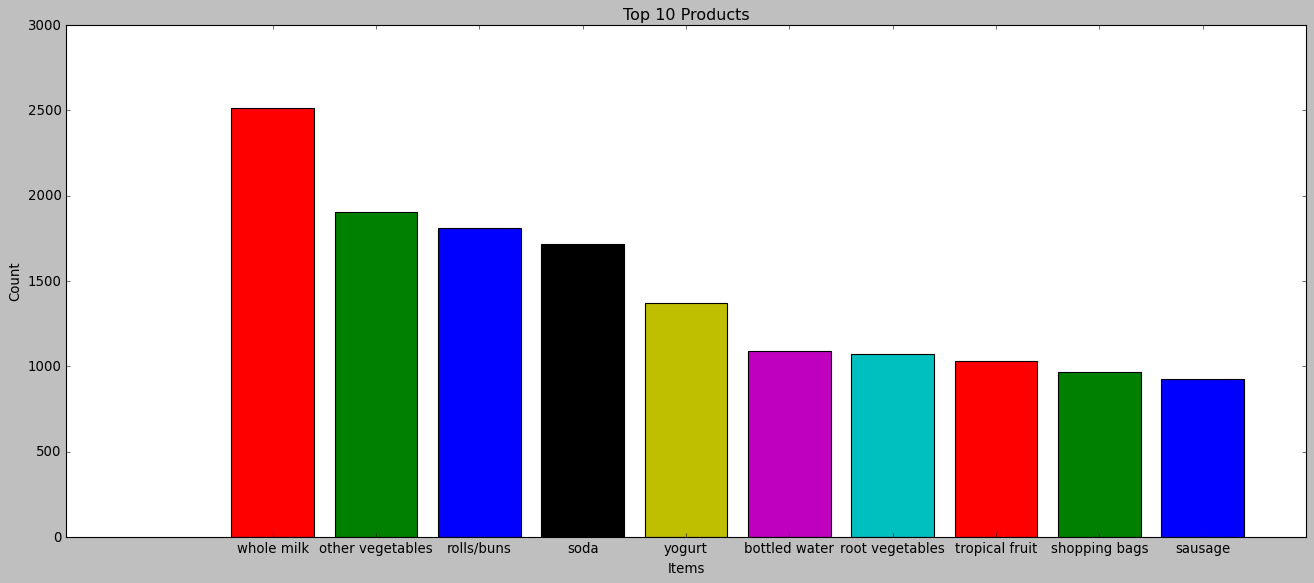

In [51]:
## Bargraph for top 10 purchased items
plt.style.use('classic')
plt.figure(figsize=(20,8))
plt.bar(x=list(range(0,10)), height=frequent[0:10], color = 'rgbkymc')
plt.xticks(list(range(0,10),), items[0:10])
plt.xlabel("Items")
plt.ylabel("Count")
plt.title("Top 10 Products")
plt.show()

In [54]:
print(len(groceries_list))

9836


In [55]:
groc_series = pd.DataFrame(pd.Series(groceries_list))
groc_series = groc_series.iloc[:9835, :]
groc_series

,0
0,"[citrus fruit, semi-finished bread, margarine,..."
1,"[tropical fruit, yogurt, coffee]"
2,[whole milk]
3,"[pip fruit, yogurt, cream cheese , meat spreads]"
4,"[other vegetables, whole milk, condensed milk,..."
...,...
9830,"[sausage, chicken, beef, hamburger meat, citru..."
9831,[cooking chocolate]
9832,"[chicken, citrus fruit, other vegetables, butt..."
9833,"[semi-finished bread, bottled water, soda, bot..."


In [56]:
groc_series.columns = ["Purchases"]
groc_series

,Purchases
0,"[citrus fruit, semi-finished bread, margarine,..."
1,"[tropical fruit, yogurt, coffee]"
2,[whole milk]
3,"[pip fruit, yogurt, cream cheese , meat spreads]"
4,"[other vegetables, whole milk, condensed milk,..."
...,...
9830,"[sausage, chicken, beef, hamburger meat, citru..."
9831,[cooking chocolate]
9832,"[chicken, citrus fruit, other vegetables, butt..."
9833,"[semi-finished bread, bottled water, soda, bot..."


In [57]:
## Getting dummy varialbes
X = groc_series['Purchases'].str.join(sep = '*').str.get_dummies(sep = '*')
X

,Instant food products,UHT-milk,abrasive cleaner,artif. sweetener,baby cosmetics,baby food,bags,baking powder,bathroom cleaner,beef,...,turkey,vinegar,waffles,whipped/sour cream,whisky,white bread,white wine,whole milk,yogurt,zwieback
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9830,0,0,0,0,0,0,0,0,0,1,...,0,0,0,1,0,0,0,1,0,0
9831,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9832,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
9833,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [76]:
## Creating frequent items
frequent_items = apriori(X, min_support= 0.01, max_len= 3, use_colnames = True)
frequent_items

,support,itemsets
0,0.033452,(UHT-milk)
1,0.017692,(baking powder)
2,0.052466,(beef)
3,0.033249,(berries)
4,0.026029,(beverages)
...,...,...
328,0.011998,"(whole milk, root vegetables, tropical fruit)"
329,0.014540,"(whole milk, root vegetables, yogurt)"
330,0.010473,"(whole milk, soda, yogurt)"
331,0.015150,"(whole milk, yogurt, tropical fruit)"


In [77]:
## Association rule Algorithm
association_rule = association_rules(frequent_items, metric = 'lift', min_threshold = 1)
association_rule

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(other vegetables),(beef),0.193493,0.052466,0.019725,0.101944,1.943066,0.009574,1.055095
1,(beef),(other vegetables),0.052466,0.193493,0.019725,0.375969,1.943066,0.009574,1.292416
2,(beef),(rolls/buns),0.052466,0.183935,0.013625,0.259690,1.411858,0.003975,1.102329
3,(rolls/buns),(beef),0.183935,0.052466,0.013625,0.074074,1.411858,0.003975,1.023337
4,(root vegetables),(beef),0.108998,0.052466,0.017387,0.159515,3.040367,0.011668,1.127366
...,...,...,...,...,...,...,...,...,...
593,"(whole milk, yogurt)",(whipped/sour cream),0.056024,0.071683,0.010880,0.194192,2.709053,0.006864,1.152033
594,"(whipped/sour cream, yogurt)",(whole milk),0.020742,0.255516,0.010880,0.524510,2.052747,0.005580,1.565719
595,(whole milk),"(whipped/sour cream, yogurt)",0.255516,0.020742,0.010880,0.042579,2.052747,0.005580,1.022807
596,(whipped/sour cream),"(whole milk, yogurt)",0.071683,0.056024,0.010880,0.151773,2.709053,0.006864,1.112881


In [79]:
association_rule[association_rule.lift>1]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(other vegetables),(beef),0.193493,0.052466,0.019725,0.101944,1.943066,0.009574,1.055095
1,(beef),(other vegetables),0.052466,0.193493,0.019725,0.375969,1.943066,0.009574,1.292416
2,(beef),(rolls/buns),0.052466,0.183935,0.013625,0.259690,1.411858,0.003975,1.102329
3,(rolls/buns),(beef),0.183935,0.052466,0.013625,0.074074,1.411858,0.003975,1.023337
4,(root vegetables),(beef),0.108998,0.052466,0.017387,0.159515,3.040367,0.011668,1.127366
...,...,...,...,...,...,...,...,...,...
593,"(whole milk, yogurt)",(whipped/sour cream),0.056024,0.071683,0.010880,0.194192,2.709053,0.006864,1.152033
594,"(whipped/sour cream, yogurt)",(whole milk),0.020742,0.255516,0.010880,0.524510,2.052747,0.005580,1.565719
595,(whole milk),"(whipped/sour cream, yogurt)",0.255516,0.020742,0.010880,0.042579,2.052747,0.005580,1.022807
596,(whipped/sour cream),"(whole milk, yogurt)",0.071683,0.056024,0.010880,0.151773,2.709053,0.006864,1.112881


In [86]:
association_rule.sort_values('lift', ascending= False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
437,"(whole milk, yogurt)",(curd),0.056024,0.053279,0.010066,0.179673,3.372304,0.007081,1.154078
440,(curd),"(whole milk, yogurt)",0.053279,0.056024,0.010066,0.188931,3.372304,0.007081,1.163866
421,(root vegetables),"(other vegetables, citrus fruit)",0.108998,0.028876,0.010371,0.095149,3.295045,0.007224,1.073242
420,"(other vegetables, citrus fruit)",(root vegetables),0.028876,0.108998,0.010371,0.359155,3.295045,0.007224,1.390354
539,"(other vegetables, yogurt)",(whipped/sour cream),0.043416,0.071683,0.010168,0.234192,3.267062,0.007056,1.212206
...,...,...,...,...,...,...,...,...,...
318,(pip fruit),(soda),0.075648,0.174377,0.013320,0.176075,1.009738,0.000128,1.002061
40,(shopping bags),(bottled water),0.098526,0.110524,0.010981,0.111455,1.008428,0.000092,1.001048
41,(bottled water),(shopping bags),0.110524,0.098526,0.010981,0.099356,1.008428,0.000092,1.000922
313,(rolls/buns),(pip fruit),0.183935,0.075648,0.013930,0.075732,1.001114,0.000015,1.000091


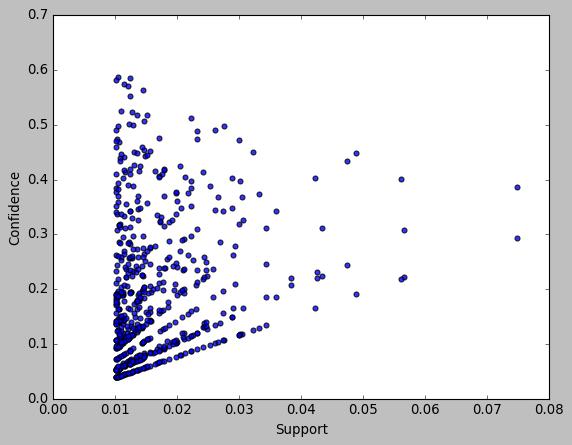

In [80]:
plt.scatter(association_rule['support'], association_rule['confidence'], alpha= 0.8)
plt.xlabel('Support')
plt.ylabel('Confidence')
plt.show()

Text(0, 0.5, 'Confidence')

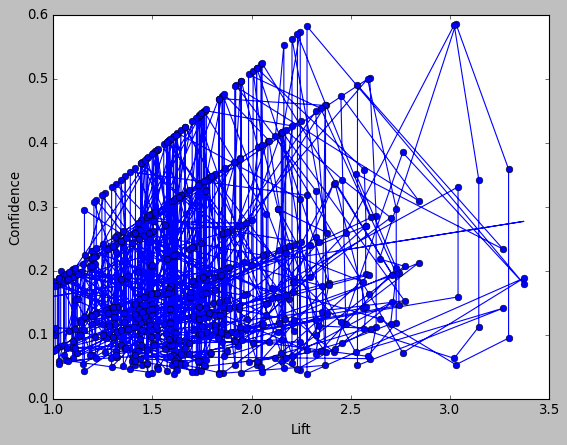

In [85]:
fit = np.polyfit(association_rule['lift'], association_rule['confidence'], 1)
fit_fn = np.poly1d(fit)
plt.plot(association_rule['lift'], association_rule['confidence'], 'bo-', association_rule['lift'], fit_fn(association_rule['lift']))
plt.xlabel('Lift')
plt.ylabel('Confidence')

In [88]:
association_rule.sort_values('lift', ascending= False).head(15)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
437,"(whole milk, yogurt)",(curd),0.056024,0.053279,0.010066,0.179673,3.372304,0.007081,1.154078
440,(curd),"(whole milk, yogurt)",0.053279,0.056024,0.010066,0.188931,3.372304,0.007081,1.163866
421,(root vegetables),"(other vegetables, citrus fruit)",0.108998,0.028876,0.010371,0.095149,3.295045,0.007224,1.073242
420,"(other vegetables, citrus fruit)",(root vegetables),0.028876,0.108998,0.010371,0.359155,3.295045,0.007224,1.390354
539,"(other vegetables, yogurt)",(whipped/sour cream),0.043416,0.071683,0.010168,0.234192,3.267062,0.007056,1.212206
542,(whipped/sour cream),"(other vegetables, yogurt)",0.071683,0.043416,0.010168,0.141844,3.267062,0.007056,1.114697
492,"(other vegetables, tropical fruit)",(root vegetables),0.035892,0.108998,0.012303,0.342776,3.144780,0.008391,1.355705
493,(root vegetables),"(other vegetables, tropical fruit)",0.108998,0.035892,0.012303,0.112873,3.144780,0.008391,1.086776
4,(root vegetables),(beef),0.108998,0.052466,0.017387,0.159515,3.040367,0.011668,1.127366
5,(beef),(root vegetables),0.052466,0.108998,0.017387,0.331395,3.040367,0.011668,1.332628


### Top 5 Associated Products

#### Curd <----> Whole milk & Yogurt
#### Other Vegetables & Citrus fruit <----> Root Vegetables
#### Other Vegetables & Yogurt <----> Whipped/Sour Cream
#### Other Vegetables & Tropical Fruit <----> Root Vegetables
#### Beef <----> Root Vegetables